In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 3.6
N= 100  : pi= 3.16
N= 1000  : pi= 3.108
N= 10000  : pi= 3.156
N= 100000  : pi= 3.14276
N= 1000000  : pi= 3.139224


N= 10000000  : pi= 3.1422012


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

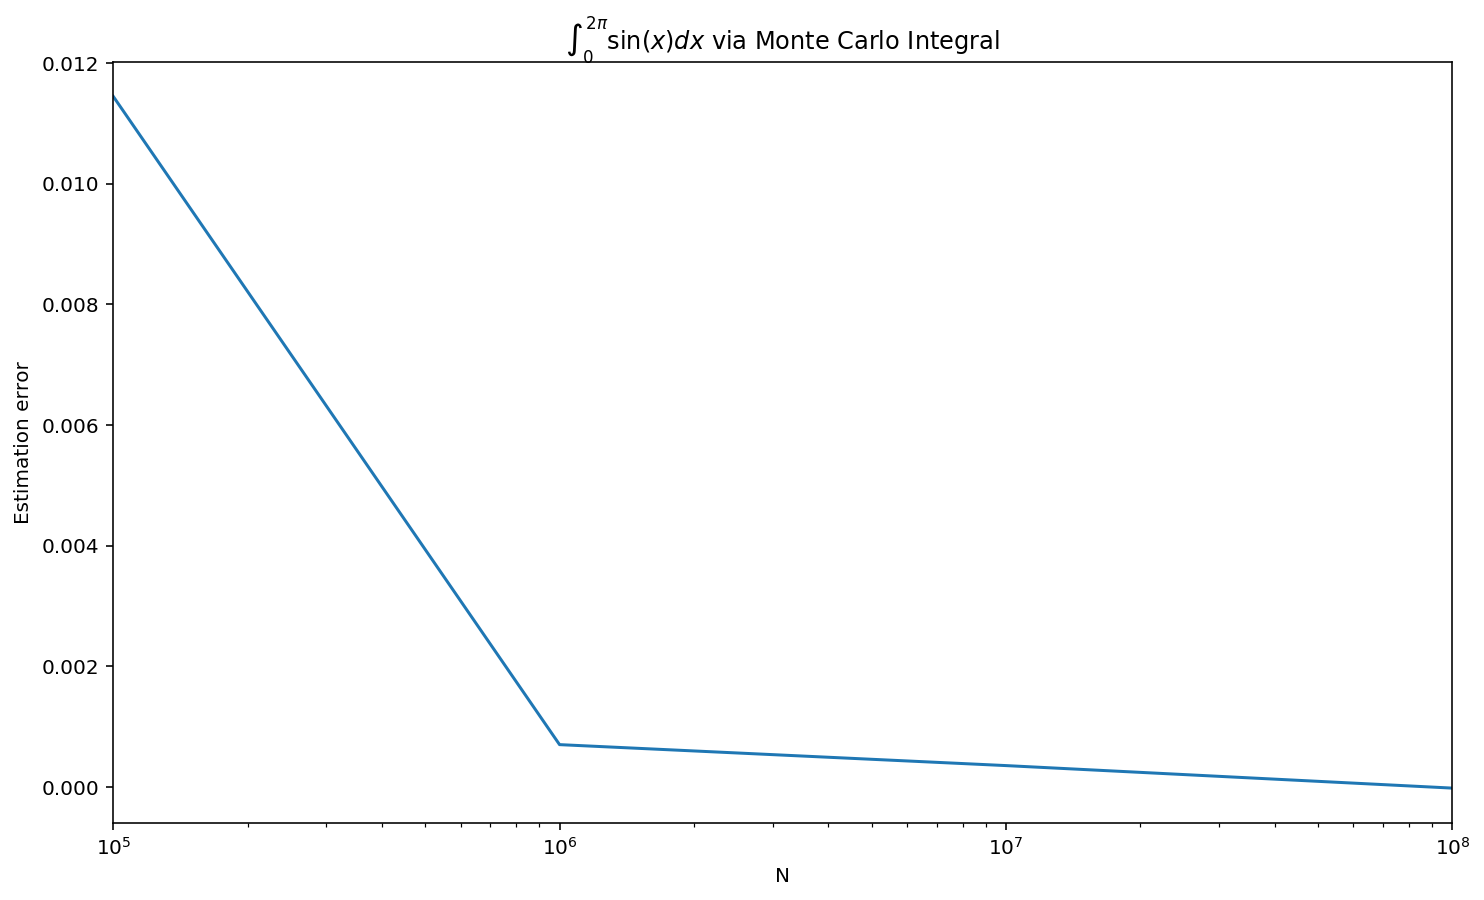

In [5]:
Ns = [10**i for i in range(5,9)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAHT221kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAXqZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAADAAADAAChIqB7aCCkyPQAAAMAAToANSN/
gdr8wDZ7RXsYyyvROvU6+ALgHqY3ugAqpl/JGnQW2rCoyzZWclD+Q70VXLRcBfMvYivqY/vWD/QQ
AaWUg8hJhLPkher6TVHZv0HR8f1erxHF5mxCDbeTlNfUcXoKMayvKSA5AAAESY/FnlDFaxAXJfNg
QRjJI9cTLCnWv7/bU3GZBnKGTketJIUe0+zmuUtMveBgMTqBEKHHh57OpbiDe83TMc6SoQu3lwGB
DvOuA5OPFixV8pjwABYnXAEKAAADAAA0YpPUGSmHNb48FNxstJtqyvnh8vmuYUzHbiMNuUR8xWO4
CAbWTg/EnT4kvsRWaWUl+r3rrV+89MS5Af5g6bi7Hmnt5umu+lN3FpQKqAAAERkqF93Xa/l5Hmkq
567O5bCJ18E7F5c/qFfW7/Mmh8G6bbbOkadjobcbAAAasAAAAwAAAwA1OJBXiNS8VrF+vPx6cD/t
efKeTdwv7GoSDb2+Bd57mvmMU0nZdeuhyNQ8wnLK3YFpZ5wTbpxRmwo7QI+BxdbvC3KoLIa/DSW3
B5N4RtopJx8UPK5cBHdMPd3yXVfA1aNqAhP4QDem3WvuD2HY+9yONctv8h1papSHqGvFvejk8UGd
nQKbJ6hFUyCPI8oifqueRyFsVXtXBPMcAHYmOWLwN3s+wPV3DZC0pjTpp+NgnzrZHe6HPKc34NlR
TzT8G3uksPmopeHNB8xjwwUCBDZg/SKhZQJBYO2XhAAKAY4I2/poAqUBggD+QfuRRtHUSLTX7zuJ
PSpNCu9JKSPwtZEtU93pz+yXobf0uwgEU7FwjIkgAAADAAADAgFHou7moTyvPfGUqTiVK2YUt3yc
2gg3jou5860ESkmU74WgDl0dLBokpwMGcOHoxvMl2SXJzBdSehlqmKIBq1bK1a2VGTPH3Jm2zngj
JzyL9+Ty6hjJ7AkfeQk9hyQwqEGQUlgnqx0If9CYmQx3kN4hTqvSC8TWxIchAAAGLAAAAwAAAwAc
Jxfmxwpn0o2sDbbfeUedkAW3cvHWcXzTfFWybG9BR9rF+h5xsAALONK64mi1er+rJenKS0+ek9kM
LQKvAJaFIZwVrQYPDeWwZ/jy7NuObvU/PQ66ToXd9Of2hW925mkdfo6u/nesvoRe8e1By1gK3VUt
4K1qEbDEfKC1WakrFsl6lDuneBv9W3M2UPqKAAA1oAE2TtVDjLW7wruXlYFzLptNFD1xmtD08rvu
Qmo055Mnj1N1z02Hyw+Y2vX6j0Xz/pv/B54hYt7Di630dlz/7d4bRUh0w16vepW728ZN3wIAOF8b
SDw/+p6oM2uOI7tmtRE/2OXKm57yRxp2WioXYACmkJ7V663J9JJaG6S+78mxWtuuxUgXtpcvQWUD
ocBbwM1MHM0UoizZX70mPv9PIABE08vvDP7K0c9i9aZVfoeDrgt9QPqp3BZGiwBHXd75EpnlJfcd
4WTUxiVvzAcdoRo/N1Zv4iT+yrFjwIII7iGe2kknDAHXpn1urmaJwDc6sK7nzBd8NWNaotrhmuac
Fjj6w1wmGxM07XDavsjq0eZ+D/2r2ZLlDbnfk5xli/6X/HfVFfh9YqgEfg4TeOBbz/YXIh+CbatG
Zp+f5cVLZekVsXSfHLgifP3Jbj/k3jbXTiFFNxKDBTbgI++wq2qoAHpb/zxNoHCnj45PVVozvGnY
6UoKSIX/6qAnwuWVYBIOqv+Eut4Gz8E8leBFKY2eXfzi21H/Ms4oiOFh0Z4WDpx1eJvsapW3fLkB
gKPip8BJhDjtNxQ+1/MtjJi7Wa6+DtpCFrSiiEJj0Nw2X8VycFb8H9vgxQiFzOAbY2JCdMtbGkht
wAnpyxS0zhdQ88eFEzB+/YxM2yRBIsMTxvoGrdG8jI+sAbq/MOr3kSSXW0Ue98C3hnF3brD/HAX0
upa9T9Dp7SuuEV6zDD2zIAACBqAAAAMAAAMApoEAAAKUQZokbEM//p4QACG5JIxSATSCNshxgsWz
gAGHbIES9mZQMDQNYaWMdJxKdKfJ7eqI7n2B6q7IKlz+3GcZPVK4zo6gNrpbCSzQzLBBd3F3nPib
LIu8h6XzZhLCFbuWYb62cSrVX6EYKK+zZ7hp0e3DBZpLtXn79+7S1wPpKnYsMZOH3UCpkN81F/mE
WFiLsXfoCTMMotmPki6cR6wsWr8QagLNv/tVJw2ehgEx/qVrNyo8Yjy1sabRcfI+lCLyDdYL3ETR
mjHUXfmFrCdrFFH2i1fHo2hzbga3WwbYJz1Qs+Hppg0f1H/JyWgBAwUy2qaGmCABZK47Rug1vplW
GuTu3l1Ja8vWvU7AoSpt60MrE8Yl7ErSztwaylM/EM2mnEhVwtFbaSXQP6mBP1fU/YRC30V8ZesV
F2mkiwgwhuv+zQhEg67ESKes94tk1I1eBQC9djWFIcVlHPrkIshpLF5ZHhw6g8d+sr78kydHJdie
ypz0fxezK448nWNYEu7jQQkEyg+DLXeiegy4IfayCV+Ma9rSysfpk4i2La/gl2DmU2kFmWkaYdnQ
ylkVOd8Se5X7s038IwjGVJTnpBPvooqG7gLnCyhPH9ioQjNwwP0UGNdpNiLFnD87yagiiaS5qW1N
l1k+COOhz5W7rXfo1usdiWxPN9QcWc6pg1PAgCQnoY4i/xizWAKtJb2N/XW7rDv9yMoWhUbkcYd5
tzoEIaUQE8qUozKdGYBHeW3wa0EeaDnoFYlVBe8AX8KQb0Ou43bfnkOhQu81MXOjdA24z0LA+mwY
Eu+95xr7Q0bvq8NpLx47GrMktkIPCpLbzZ3FkKH+RQcwF7wX6GABAz/cI6f/7nxDbn63L7JxjmPs
MtRVLucF3MAmAAAAnUGeQ

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.